##  Predicting Wine Quality: Insights from Physicochemical Properties  🍷
Group 6: Felix Li, Gurman Gill, Dia Zavery, Steve He

## 1. Summary
[Summary]

## 2. Introduction

Wine has been a symbol of culture and refinement throughout human history, with its production dating back thousands of years. The complexity of wine, influenced by its physicochemical properties, has fascinated scientists and winemakers alike. In recent years, the wine industry has increasingly turned to data analysis and machine learning to understand and predict wine quality. This scientific approach aims to decode the relationship between the chemical composition of wine and its quality as perceived by consumers.

In this project, our primary goal was to determine the best regression model for predicting wine quality and to identify which factors most effectively predict it. The quality of wine is a subject of interest for both enthusiasts and professionals in the field, as it can vary significantly based on a variety of measurable physicochemical properties. By applying regression analysis, we aimed to uncover the relationships between these properties and wine quality, thereby providing a predictive model that could be useful for winemakers and consumers alike. Our research question was formulated as follows: **"What is the best regression model to predict wine quality?"**

To address this question, we utilized a dataset that comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), featuring two datasets related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets include 4,898 instances, with 11 features covering various physicochemical properties (such as acidity, sugar level, alcohol content) and 1 output variable representing sensory quality ratings on a scale. The datasets present an opportunity for both classification and regression analyses to model wine quality based on these properties.

Our approach involved conducting a comprehensive analysis to explore the relationships between the physicochemical attributes and the quality scores. Through the use of regression analysis and the implementation of a forward selection algorithm, we aimed to identify the most significant predictors of wine quality. This process allowed us to not only pinpoint the factors that have the most substantial impact on quality but also to determine the most accurate regression model for predicting the quality scores of wine based on its properties.

## 3. Data cleaning and wrangling 

In [91]:
library(tidyverse)
library(dplyr)
library(GGally)
install.packages("rsample")
library(rsample)
install.packages("leaps")
library(leaps)
install.packages("metrics")
install.packages("yardstick")
library(yardstick)


The downloaded binary packages are in
	/var/folders/bx/qyftpyfn1jx3xphzw9gn7g5c0000gn/T//Rtmpq1sT1m/downloaded_packages

The downloaded binary packages are in
	/var/folders/bx/qyftpyfn1jx3xphzw9gn7g5c0000gn/T//Rtmpq1sT1m/downloaded_packages


Warning message:
“package ‘metrics’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘Metrics’ ?”
also installing the dependency ‘hardhat’





The downloaded binary packages are in
	/var/folders/bx/qyftpyfn1jx3xphzw9gn7g5c0000gn/T//Rtmpq1sT1m/downloaded_packages



Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec




In [2]:
library(tidyverse)
library(dplyr)
library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [47]:
wine_data <- read.csv("data/winequality-red.csv",sep = ";")
head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [39]:
levels(as.factor(wine_data$quality))

[1] "3" "4" "5" "6" "7" "8"

In [5]:
data2 <- data %>%
  mutate(quality = ifelse(quality <= 5, "bad", "good"))
head(data2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,bad
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,bad
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,bad


## 4. EDA

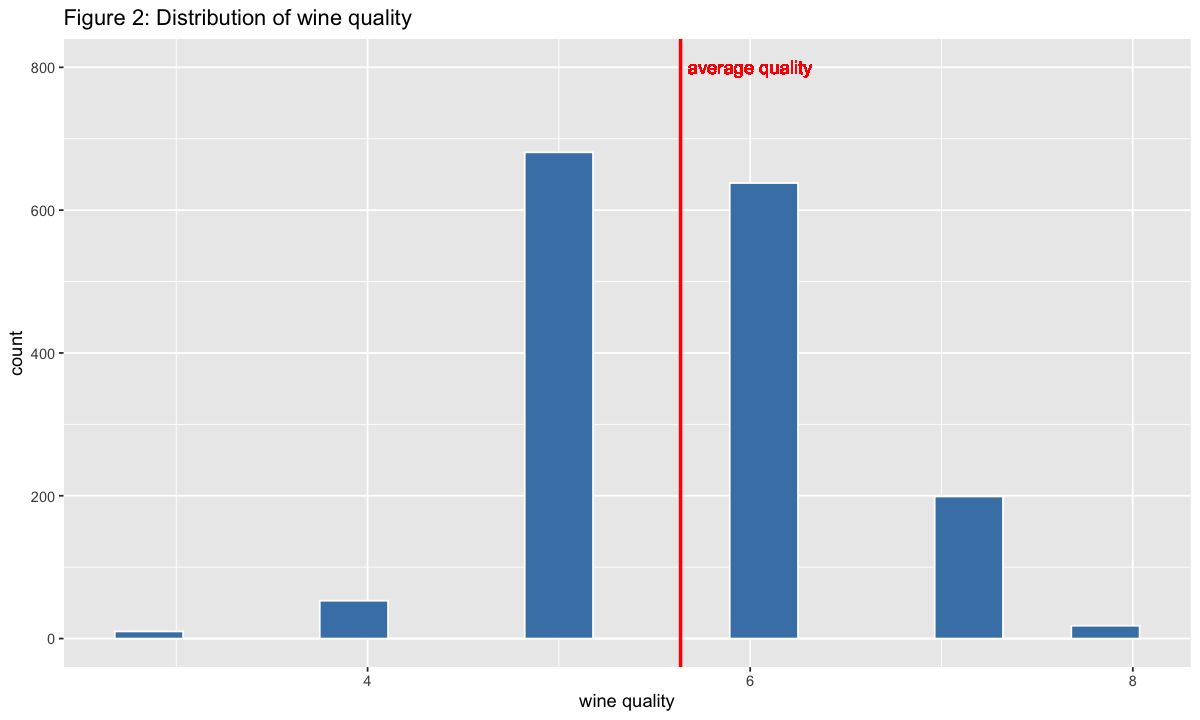

In [37]:
# options(repr.plot.width=10, repr.plot.height=6)
Price_distribution_plot <- ggplot(df, aes(x = quality)) + 
  geom_histogram(fill = "steelblue", color = "white", bins = 15) + 
  geom_vline(xintercept = mean(df$quality, na.rm = TRUE),
             col = "red", size = 1) +
  geom_text(aes(x = 6, y =800, label = "average quality"), color = "red") +
  labs(title = "Figure 2: Distribution of wine quality ", 
       x = "wine quality", y = "count") 

Price_distribution_plot

`geom_smooth()` using formula = 'y ~ x'


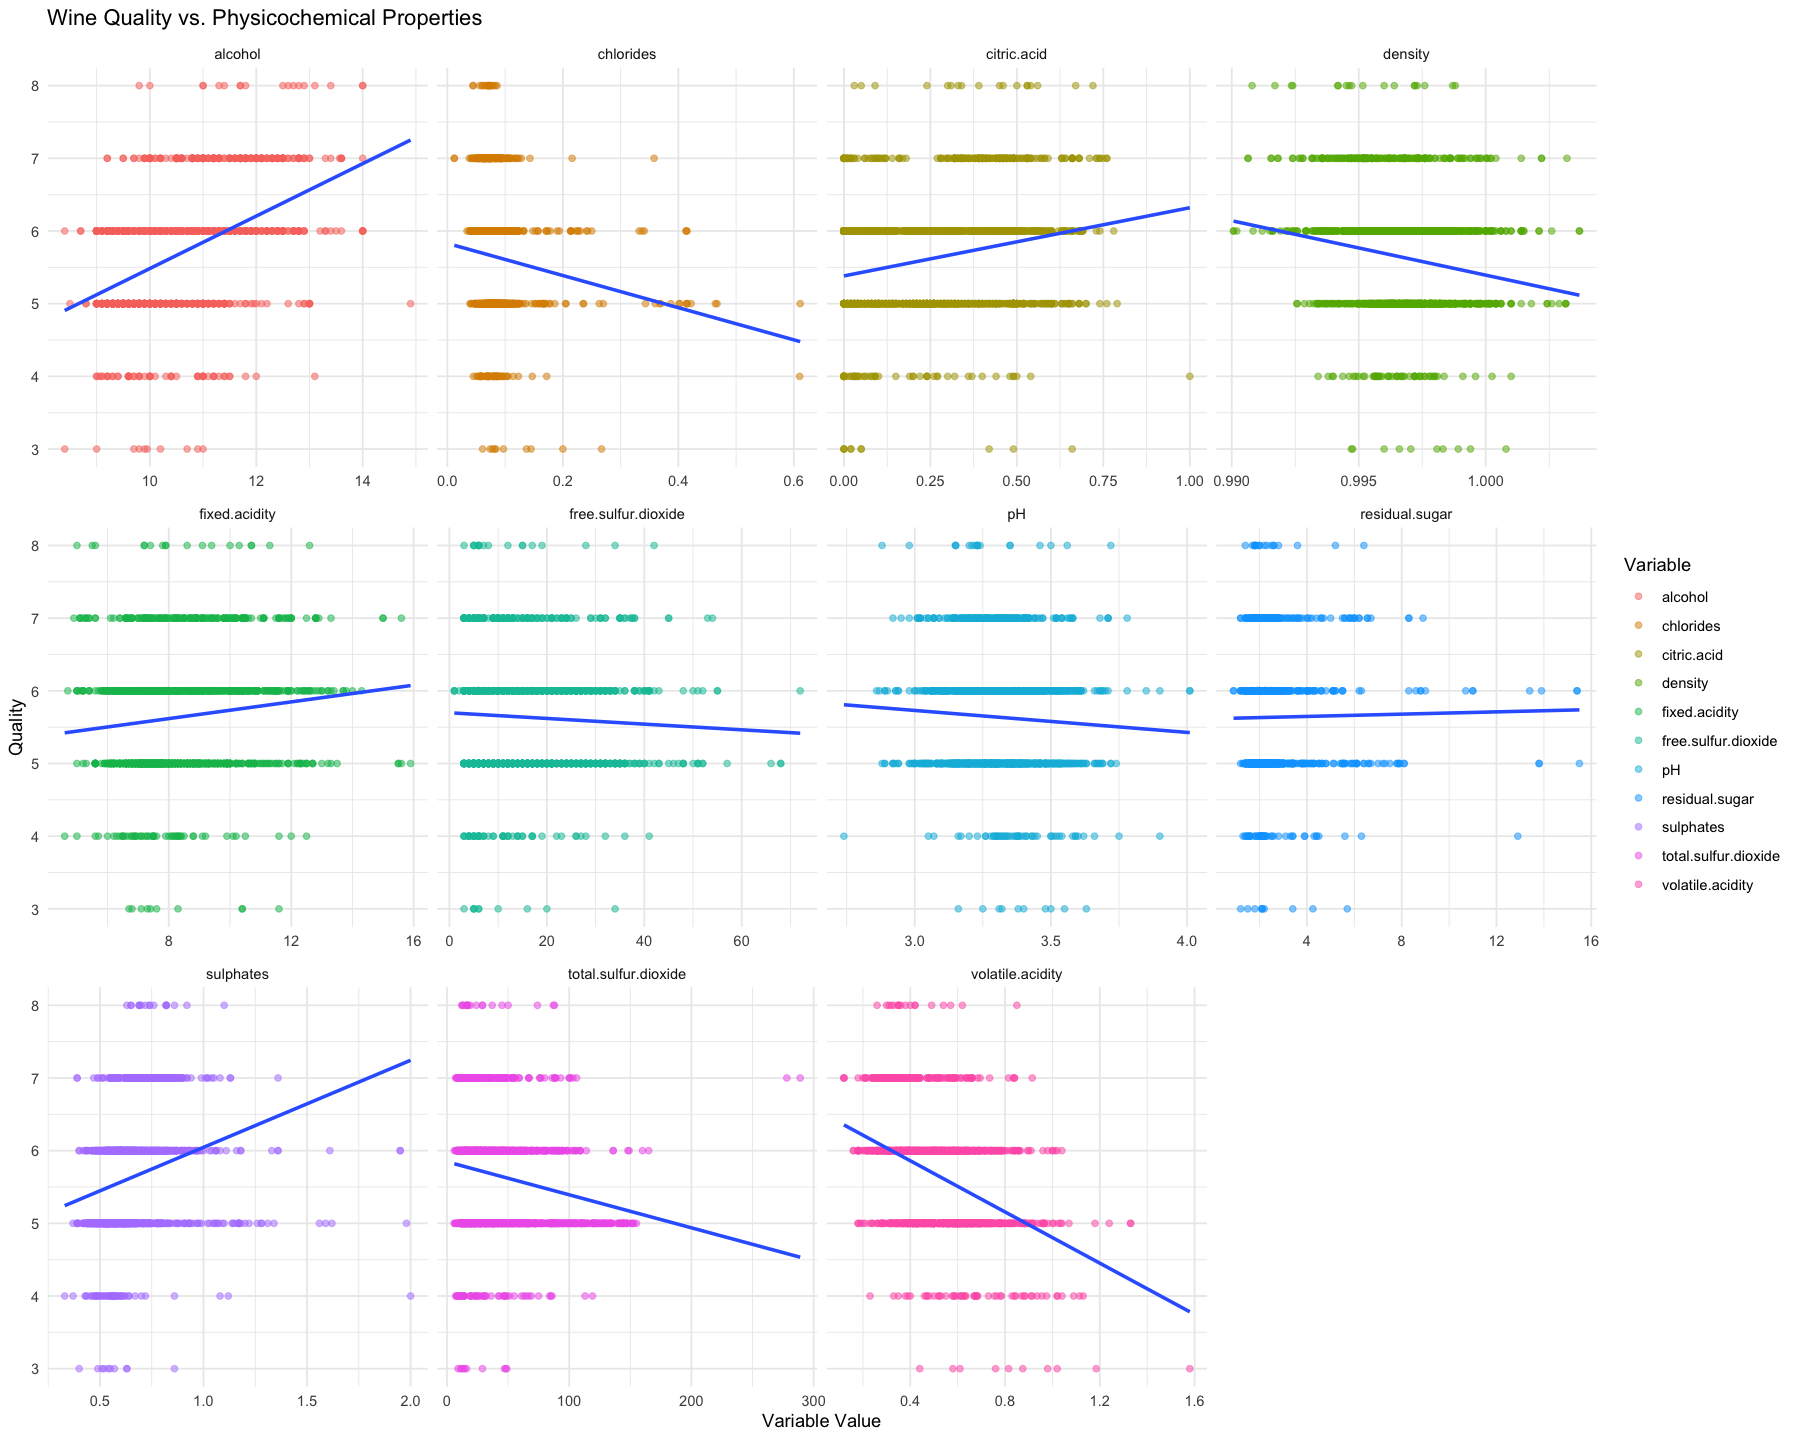

In [41]:
long_wine_data <- wine_data %>%
  pivot_longer(cols = -quality, names_to = "Variable", values_to = "Value")

ggplot(long_wine_data, aes(x = Value, y = quality)) +
  geom_point(aes(color = Variable), alpha = 0.5) +
  geom_smooth(se = FALSE, method = "lm") +
  facet_wrap(~ Variable, scales = "free_x") +
  labs(title = "Wine Quality vs. Physicochemical Properties",
       x = "Variable Value",
       y = "Quality") +
  theme_minimal()

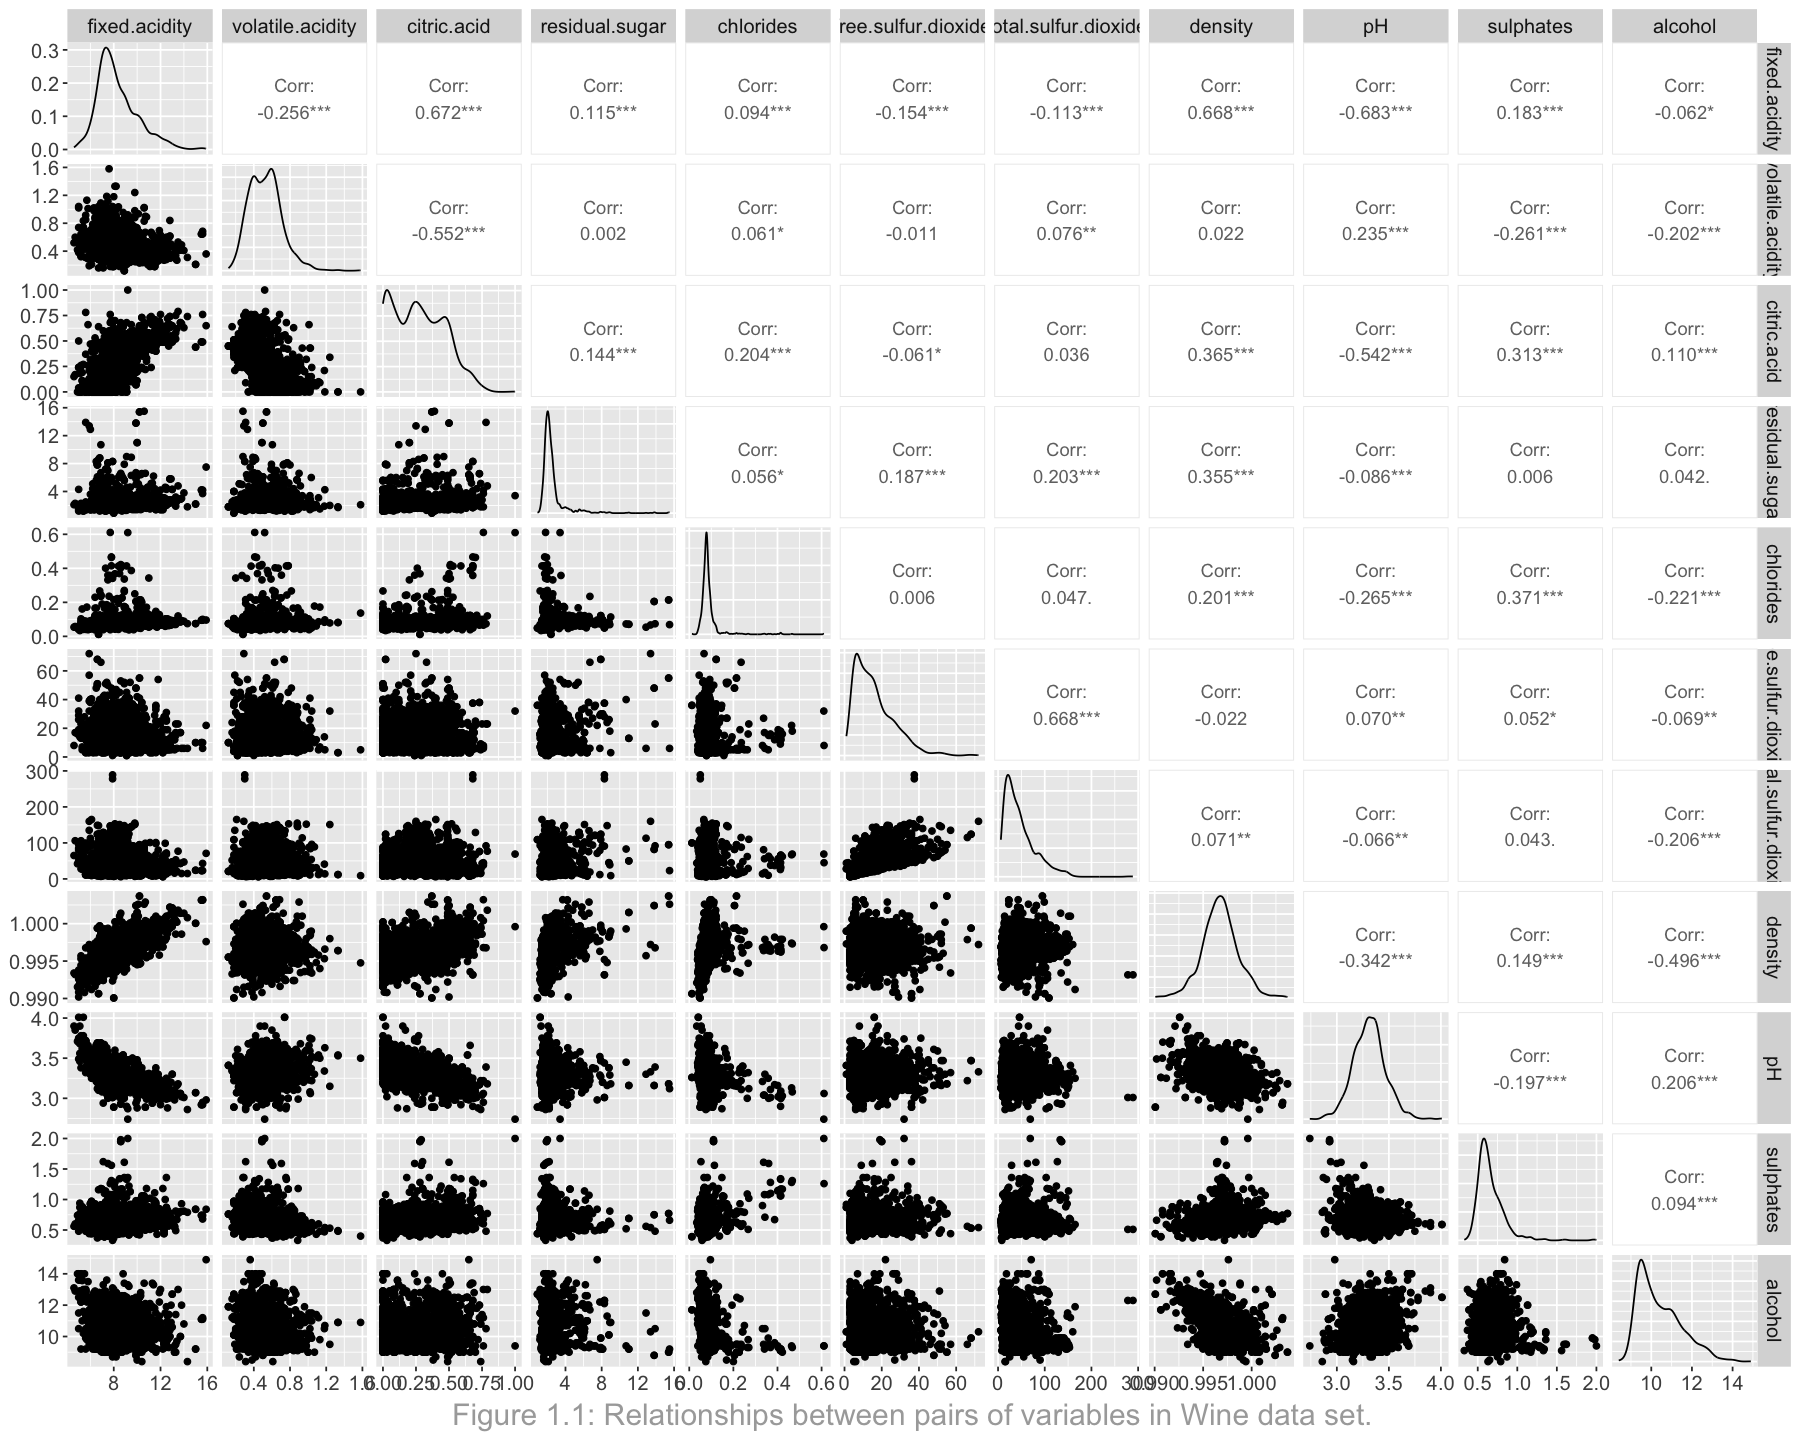

In [40]:
options(repr.plot.width = 15, repr.plot.height = 12)

correlation_plots <- wine_data %>%
  select(- quality) %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    plot.caption = element_text(color = "darkgrey", size = 18, hjust = 0.5, vjust = 1)
  ) + 
  labs(caption = "Figure 1.1: Relationships between pairs of variables in Wine data set.")
  
  
correlation_plots

**Remove the variables that has high correlation with others**


From the plot above, we notice that there are some variables that has high correlation with others:
- citric.acid and fixed acidity
- PH and citric.acid
- density and fixed acidity
- free.sulfur.dioxide and total.sulfur.dioxide

In order to prevent multicollinearity, we decide to remove citric.acid, density and free.sulfur.dioxide 

In [43]:
model_data <- subset(wine_data, select = -c(citric.acid,density,free.sulfur.dioxide))
head(model_data) 

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,1.9,0.076,34,3.51,0.56,9.4,5
2,7.8,0.88,2.6,0.098,67,3.20,0.68,9.8,5
3,7.8,0.76,2.3,0.092,54,3.26,0.65,9.8,5
4,11.2,0.28,1.9,0.075,60,3.16,0.58,9.8,6
5,7.4,0.70,1.9,0.076,34,3.51,0.56,9.4,5
6,7.4,0.66,1.8,0.075,40,3.51,0.56,9.4,5


## 5. Method

In [52]:
set.seed(100) # set seed
# Splitting the data into two sets: 60% training and 40% testing
data_split_train <- initial_split(model_data, prop = 0.6)
data_train <- training(data_split_train)  # Training set
data_test <- testing(data_split_train)  # Training set


head(data_train)

,fixed.acidity,volatile.acidity,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,10.4,0.44,6.55,0.074,76,3.17,0.85,12.0,7
2,6.8,0.83,1.80,0.074,25,3.38,0.45,9.6,5
3,12.2,0.45,1.40,0.075,6,3.13,0.63,10.4,5
4,6.8,0.36,1.80,0.067,8,3.36,0.55,12.8,7
5,8.4,0.36,2.20,0.081,79,3.30,0.72,11.0,6
6,8.7,0.82,1.20,0.070,48,3.20,0.58,9.8,5


In order to select the best LR model, we will use forward selection because it enables a more efficient selection process than a process such as backward selection. To begin, we will split our data into training data and testing data. To apply forward stepwise selection, we will start with the intercept-only model, select and add variables sequentially, and finally select the best model of the p models, where p = number of predictor variables. The “best” model can be defined by metrics such as the test MSE which can be revealed with Cp or BIC or adjusted $R^2$ for predictive model selection. Specifically, we can look for the model with biggest adjusted $R^2$, which indicates a stronger out-of-sample prediction accuracy.

We will obtain 8 possible models obtained using forward selection method.

In [56]:
forward <- regsubsets(
  x = quality ~ ., nvmax = 8,
  data = data_train,
  method = "forward",
)

forward_summary <- summary(forward)
forward_summary

Subset selection object
Call: regsubsets.formula(x = quality ~ ., nvmax = 8, data = data_train, 
    method = "forward", )
8 Variables  (and intercept)
                     Forced in Forced out
fixed.acidity            FALSE      FALSE
volatile.acidity         FALSE      FALSE
residual.sugar           FALSE      FALSE
chlorides                FALSE      FALSE
total.sulfur.dioxide     FALSE      FALSE
pH                       FALSE      FALSE
sulphates                FALSE      FALSE
alcohol                  FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         fixed.acidity volatile.acidity residual.sugar chlorides
1  ( 1 ) " "           " "              " "            " "      
2  ( 1 ) " "           "*"              " "            " "      
3  ( 1 ) " "           "*"              " "            " "      
4  ( 1 ) " "           "*"              " "            " "      
5  ( 1 ) " "           "*"              " "            "*"      
6  ( 1 ) " "        

In [58]:
forward_summary_df <- tibble(
    n_input_variables = 1:8, 
    RSQ = forward_summary$rsq,
    RSS = forward_summary$rss,
    ADJ.R2 = forward_summary$adjr2,
)
forward_summary_df

n_input_variables,RSQ,RSS,ADJ.R2
<int>,<dbl>,<dbl>,<dbl>
1,0.2625017,443.6771,0.2617311
2,0.3429754,395.2643,0.3416009
3,0.3584219,385.9718,0.3564065
4,0.3635412,382.8920,0.3608726
5,0.3692863,379.4358,0.3659772
6,0.3715254,378.0887,0.3675644
7,0.3723643,377.5841,0.3677445
8,0.3727042,377.3796,0.3674217


From the table above, the adjusted $R^2$ will start decreasing after 14 variables are selected. 
Hence we will be using the model with 7 variables.

In [62]:
selected_var <- names(coef(forward, 7))[-1] 
selected_var

[1] "volatile.acidity"     "residual.sugar"       "chlorides"           
[4] "total.sulfur.dioxide" "pH"                   "sulphates"           
[7] "alcohol"

In [66]:
#subset only the predictors selected from the full dataset.
training <- data_train %>% select(all_of(selected_var),quality)
testing <- data_test %>% select(all_of(selected_var),quality)

In [67]:
model <- lm(quality ~ .,
data = training
)

In [100]:
#use the model to make prediction for testing dataset and combine it with the testing dataset
select_pred <- predict(model, newdata = data_test) %>%
    bind_cols(data_test)  

df <- select_pred %>% 
     rename(pridictedQuality = `...1`) %>%
     select(pridictedQuality, quality) %>%
     head()
df

New names:
• `` -> `...1`


,pridictedQuality,quality
,<dbl>,<int>
1,5.034839,5
2,5.067650,5
3,5.267518,7
4,5.277228,7
5,5.745658,5
6,5.818305,5


In [98]:
## evaluate our final model
prediction_accuracy <- df %>%
       metrics(truth = quality, estimate = pridictedQuality) 

prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.0955105
rsq,standard,0.0491032
mae,standard,0.8536178


## 4. Discussion

### 4.1. Summary and Expectations

[Do after Methods and Results]

### 4.2. Impact and Future Questions

[Impact done after Methods and Results]

Building on our initial analysis, future research could explore the impact of environmental changes like climate on the physicochemical composition of wine, delve into the genetic factors influencing grape quality, and employ advanced machine learning algorithms to uncover complex relationships between wine characteristics and sensory perceptions. Specifically, alternative data analysis methods such as deep learning and neural networks could be employed to analyze large datasets more effectively, identifying non-linear relationships and subtle patterns that traditional statistical methods may miss. Additionally, integrating big data analytics to process and analyze the vast amount of data generated from different wine regions could offer unprecedented insights into regional and varietal influences on wine quality. Investigating alternative fermentation techniques and conducting comparative studies across different wine regions could reveal new insights into optimizing wine quality. These efforts should embrace interdisciplinary approaches, combining advanced data analysis, biotechnology, and sensory evaluation to enhance our understanding of wine quality. Such research would not only deepen our knowledge of the factors affecting wine but also support the industry in adapting to evolving challenges and preferences, ultimately enriching the wine production and selection process.

<<<<<<< REMOTE CELL DELETED >>>>>>>
## 6. Discussion
[Discussion]

## 5. References
Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.